1. Import the required libraries in Python.

In [77]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PART 1

Read CSV File.

In [30]:
df = pd.read_csv('data/time_series_19-covid-Confirmed_archived_0325.csv')

2. Select the Confirmed Cases of Country = “India”/row = 15 from the given columns (from column 5 onwards).


4. Convert the date column to day/month format.


In [31]:
df_india = df[df['Country/Region'] == "India"].iloc[:,4:]

date_label = []

date_ = pd.to_datetime(df_india.columns)

for col in df_india.columns:
    x = datetime.strptime(col, '%m/%d/%y')
    d = x.strftime('%d %b')
    date_label.append(d)
    
df_india.columns = date_label

n_cases = df_india.iloc[0]    


3 . Write a function in Python to get the required data and parameters for plotting.

5 . Plot the confirmed cases on Y-axis with the dates on X-axis

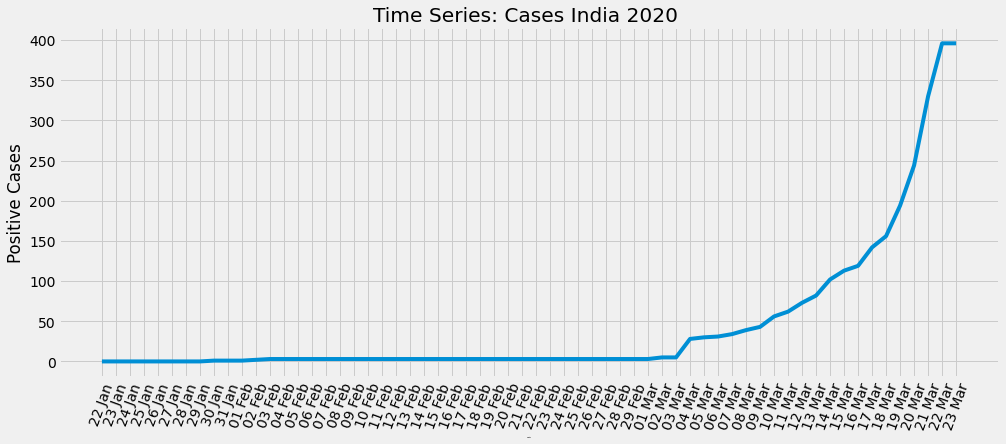

In [25]:
def plot_function(n_cases):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Labelling the axes and setting
    ax.grid(True)
    plt.style.use("fivethirtyeight")
    # a title
    plt.xlabel("Date",fontsize=2)
    plt.ylabel("Positive Cases")
    plt.title("Time Series: Cases India 2020 ")
    ax.grid(True)
    # plotting the "A" column alone
    plt.xticks(rotation=70)

    plt.plot(n_cases)
plot_function(n_cases)

In [11]:
import plotly.express as px

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(n_cases)
fig.show()

Animate Function
------------
A function is simply a geometric (ie: position, size, angle) component of an animation. ... When you add a keyframe to a layer or to the camera, a keyframe is created for each animation function for that layer or camera, and that keyframe stores the value for that function at the current frame.

MovieWriter ffmpeg unavailable; using Pillow instead.


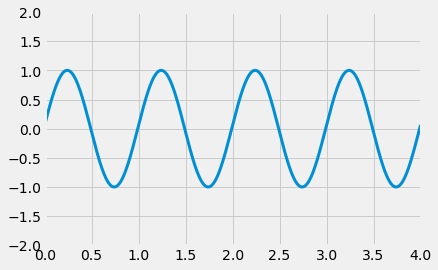

In [33]:

# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4),
                ylim =(-2, 2))
 
# initializing a line variable
line, = axis.plot([], [], lw = 3)
 
# data which the line will
# contain (x, y)
def init():
    line.set_data([], [])
    return line,
 
def animate(i):
    x = np.linspace(0, 4, 1000)
 
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
     
    return line,
 
anim = FuncAnimation(fig, animate,
                    init_func = init,
                    frames = 200,
                    interval = 20,
                    blit = True)
 
anim.save('SineWave.gif',
          writer = 'ffmpeg', fps = 30)

# Part 2

In [38]:
#Reading CSV FIle
droplet=pd.read_csv('DropletData.csv')
droplet

,Unnamed: 0,Area,Count,maxFeret,minFeret,Perimeter,class
0,1,34.597073,1394,7.178624,4.846646,24.155433,U
1,2,37.834522,1294,7.534622,5.069885,25.006611,U
2,3,37.423876,1338,7.354161,4.994525,24.084755,U
3,4,36.133785,1374,7.267336,4.817726,23.775612,U
4,5,31.652493,1566,6.917425,4.656928,22.818458,U
...,...,...,...,...,...,...,...
145,146,6.671160,6390,3.893488,2.540674,11.382212,T
146,147,6.713676,6657,3.898151,2.553997,11.299202,T
147,148,6.990750,6207,3.953353,2.585886,11.682566,T
148,149,7.250347,6097,4.026888,2.622310,11.988663,T


In [40]:
#CHecking Dtypes:
droplet.dtypes

Unnamed: 0      int64
Area          float64
Count           int64
maxFeret      float64
minFeret      float64
Perimeter     float64
class          object
dtype: object

In [42]:
#Checking for null values
droplet.isna().sum()

Unnamed: 0    0
Area          0
Count         0
maxFeret      0
minFeret      0
Perimeter     0
class         0
dtype: int64

In [44]:
#checking unique classes:
droplet['class'].unique()

array(['U', 'M', 'A', 'T'], dtype=object)

In [48]:
#Replacing classes with numerical values
droplet['Class']=droplet['class'].replace({'U':1,'M':2,'A':3,'T':4})
droplet

,Unnamed: 0,Area,Count,maxFeret,minFeret,Perimeter,class,Class
0,1,34.597073,1394,7.178624,4.846646,24.155433,U,1
1,2,37.834522,1294,7.534622,5.069885,25.006611,U,1
2,3,37.423876,1338,7.354161,4.994525,24.084755,U,1
3,4,36.133785,1374,7.267336,4.817726,23.775612,U,1
4,5,31.652493,1566,6.917425,4.656928,22.818458,U,1
...,...,...,...,...,...,...,...,...
145,146,6.671160,6390,3.893488,2.540674,11.382212,T,4
146,147,6.713676,6657,3.898151,2.553997,11.299202,T,4
147,148,6.990750,6207,3.953353,2.585886,11.682566,T,4
148,149,7.250347,6097,4.026888,2.622310,11.988663,T,4


In [50]:
droplet.drop(columns=['class','Unnamed: 0'],inplace=True)

KeyError: "['class' 'Unnamed: 0'] not found in axis"

In [52]:
feat=droplet.drop(columns=['Class'])
feat

,Area,Count,maxFeret,minFeret,Perimeter
0,34.597073,1394,7.178624,4.846646,24.155433
1,37.834522,1294,7.534622,5.069885,25.006611
2,37.423876,1338,7.354161,4.994525,24.084755
3,36.133785,1374,7.267336,4.817726,23.775612
4,31.652493,1566,6.917425,4.656928,22.818458
...,...,...,...,...,...
145,6.671160,6390,3.893488,2.540674,11.382212
146,6.713676,6657,3.898151,2.553997,11.299202
147,6.990750,6207,3.953353,2.585886,11.682566
148,7.250347,6097,4.026888,2.622310,11.988663


In [54]:
class_=droplet[['Class']]
class_

,Class
0,1
1,1
2,1
3,1
4,1
...,...
145,4
146,4
147,4
148,4


# PCA

In [60]:
droplet_data=droplet.drop(columns=['Class'])
droplet_data.describe()

,Area,Count,maxFeret,minFeret,Perimeter
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,16.439957,3809.126667,5.292212,3.533267,16.242127
std,10.472195,1672.896561,1.235050,0.845881,4.509135
min,6.631277,1294.000000,3.835207,2.538437,10.972499
25%,9.682469,1865.750000,4.506619,3.000382,13.355623
50%,10.852975,4199.000000,4.723020,3.143958,14.113033
75%,25.610785,4615.250000,6.617471,4.393674,20.877226
max,39.231232,6657.000000,7.700127,5.229407,25.006611


# Applying Standers Scaller

In [66]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(droplet_data)
df=pd.DataFrame(scaled_data,columns=droplet_data.columns)
df.describe()

,Area,Count,maxFeret,minFeret,Perimeter
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02
mean,-3.789561e-16,0.000000,-3.789561e-16,-4.736952e-16,4.736952e-17
std,1.003350e+00,1.003350,1.003350e+00,1.003350e+00,1.003350e+00
min,-9.397782e-01,-1.508493,-1.183666e+00,-1.180028e+00,-1.172571e+00
25%,-6.474408e-01,-1.165575,-6.382127e-01,-6.320876e-01,-6.422904e-01
50%,-5.352936e-01,0.233834,-4.624095e-01,-4.617837e-01,-4.737552e-01
75%,8.786650e-01,0.483487,1.076635e+00,1.020579e+00,1.031379e+00
max,2.183652e+00,1.708064,1.956182e+00,2.011893e+00,1.950229e+00


Drawing PCA

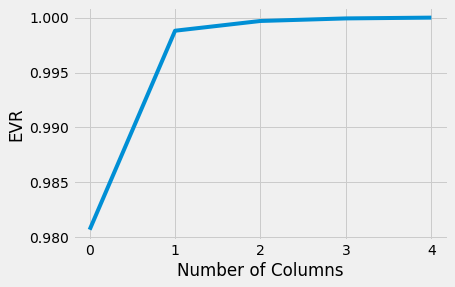

In [70]:
pca=PCA()
pca.fit_transform(df) 
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Columns')
plt.ylabel('EVR')
plt.show()

In [72]:
pca1=PCA(n_components=3)

In [74]:
new_data=pca1.fit_transform(df)
new_data

array([[ 3.59667148e+00,  1.77704722e-01,  1.39576734e-01],
       [ 4.09658115e+00,  3.58026833e-01,  9.72680091e-02],
       [ 3.86854993e+00,  3.07467324e-01,  1.62863954e-01],
       [ 3.64653571e+00,  2.30047321e-01,  2.15933648e-01],
       [ 3.09437116e+00,  4.09720212e-02,  1.22032097e-01],
       [ 3.80975939e+00,  3.09975097e-01,  1.45850251e-01],
       [ 3.68224452e+00,  2.62951991e-01,  2.38055108e-01],
       [ 3.57826355e+00,  1.89585408e-01,  2.06925905e-01],
       [ 3.78793554e+00,  2.65835791e-01,  1.04223673e-01],
       [ 3.80843246e+00,  2.82712778e-01,  1.57238965e-01],
       [ 3.24999929e+00,  5.08821310e-02,  3.20785448e-03],
       [ 3.10721506e+00,  3.04381505e-02,  1.73300669e-02],
       [ 3.22171495e+00,  6.24551657e-02,  2.48178339e-02],
       [ 3.32855975e+00,  8.79605813e-02, -1.67026396e-02],
       [ 4.00182920e+00,  3.60230896e-01, -2.06986140e-02],
       [ 3.29043903e+00,  9.54681731e-02,  1.47095628e-01],
       [ 3.46916950e+00,  1.75117385e-01

In [76]:
new_Df=pd.DataFrame(new_data,columns=['PC1','PC2','PC3'])
new_Df

,PC1,PC2,PC3
0,3.596671,0.177705,0.139577
1,4.096581,0.358027,0.097268
2,3.868550,0.307467,0.162864
3,3.646536,0.230047,0.215934
4,3.094371,0.040972,0.122032
...,...,...,...
145,-2.624737,0.477363,0.019589
146,-2.692321,0.613840,-0.035139
147,-2.486891,0.418966,0.025037
148,-2.369839,0.395206,0.014852


# Apply Kmeans

In [82]:
kmeans1=KMeans(max_iter=100,n_clusters=8)
kmeans1.fit(new_Df,class_)
droplet

,Area,Count,maxFeret,minFeret,Perimeter,Class
0,34.597073,1394,7.178624,4.846646,24.155433,1
1,37.834522,1294,7.534622,5.069885,25.006611,1
2,37.423876,1338,7.354161,4.994525,24.084755,1
3,36.133785,1374,7.267336,4.817726,23.775612,1
4,31.652493,1566,6.917425,4.656928,22.818458,1
...,...,...,...,...,...,...
145,6.671160,6390,3.893488,2.540674,11.382212,4
146,6.713676,6657,3.898151,2.553997,11.299202,4
147,6.990750,6207,3.953353,2.585886,11.682566,4
148,7.250347,6097,4.026888,2.622310,11.988663,4


In [83]:
kmeans1.predict(pca1.transform(scaler.transform([[34.597073,1394,7.178624,4.846646,24.155433]])))

C:\Users\nico_\anaconda3\envs\ITSLIGO\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\nico_\anaconda3\envs\ITSLIGO\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

C:\Users\nico_\anaconda3\envs\ITSLIGO\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([6])